Introduction

In this activity, you will apply clustering and dimensionality reduction techniques to a dataset and interpret the outcomes. You will use both k-means clustering and principal component analysis (PCA) or t-distributed stochastic neighbor embedding (t-SNE) to analyze a dataset and uncover hidden patterns or clusters. The goal is to understand how these techniques work together to simplify data and reveal meaningful groupings.

By the end of this activity, you'll be able to:

    Apply k-means clustering: learn how this technique can help to identify distinct clusters in data.

    Perform dimensionality reduction: use PCA or t-SNE to reduce the dataset's dimensions, making it easier to visualize and analyze high-dimensional data while retaining significant patterns.

    Visualize and interpret results: create scatter plots to visualize clusters and dimensionality reduction outcomes, and interpret how these methods reveal hidden patterns or simplify complex datasets.

Step-by-step guide:
Step 1: Setting up the environment

Before starting the activity, ensure that you have the necessary libraries installed. You will need pandas, Scikit-learn, and Matplotlib. Install the required libraries using the following command:

In [1]:
pip install pandas scikit-learn matplotlib

Step 2: Importing required libraries

Import the necessary libraries for data manipulation, clustering, dimensionality reduction, and visualization:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

Step 3: Loading the dataset

You will use a sample dataset containing customer information, including Annual Income, Spending Score, and Age. Load the dataset using the following code:

In [3]:
# Create a sample dataset with customer annual income, spending score, and age
data = {'AnnualIncome': [15, 16, 17, 18, 19, 20, 22, 25, 30, 35],
        'SpendingScore': [39, 81, 6, 77, 40, 76, 94, 5, 82, 56],
        'Age': [20, 22, 25, 24, 35, 40, 30, 21, 50, 31]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore  Age
0            15             39   20
1            16             81   22
2            17              6   25
3            18             77   24
4            19             40   35


Step 4: Preprocessing the data

Before applying clustering and dimensionality reduction, it is essential to preprocess the data by scaling the features. Use StandardScaler to normalize the data:

In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore', 'Age'])
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age
0     -1.086741      -0.546384 -1.074654
1     -0.924540       0.836033 -0.855337
2     -0.762340      -1.632569 -0.526361
3     -0.600140       0.704374 -0.636020
4     -0.437940      -0.513469  0.570225


Step 5: Applying k-means clustering

Now, apply k-means clustering to group the customers into clusters based on their spending behavior and income. Use k = 3 clusters for this task:

In [26]:
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster assignments
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age  KMeans_Cluster
0     -1.086741      -0.546384 -1.074654               2
1     -0.924540       0.836033 -0.855337               0
2     -0.762340      -1.632569 -0.526361               2
3     -0.600140       0.704374 -0.636020               0
4     -0.437940      -0.513469  0.570225               2


The k-means algorithm will assign each customer to one of the three clusters.

The KMeans_Cluster column will indicate the cluster assignment for each customer.

Step 6: Visualizing k-means clusters

Visualize the clusters using a scatter plot. Color the data points based on their cluster assignment:

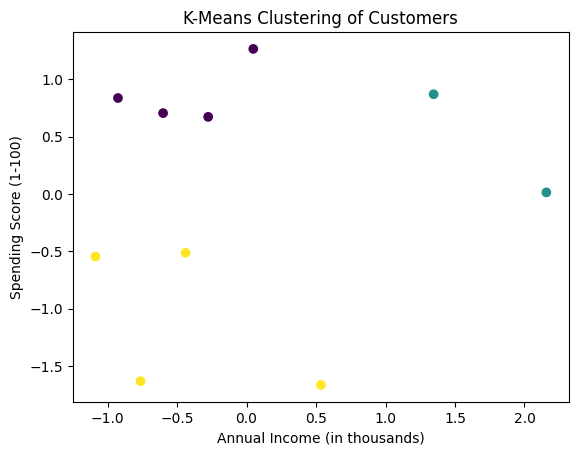

In [27]:
# Visualize the K-Means clusters
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Analyze Cluster Characteristics

You can use the groupby() method in pandas to group the scaled DataFrame by the KMeans cluster assignments and then calculate descriptive statistics like mean and median for each feature within each cluster.

In [11]:
# Group by the KMeans cluster and describe the characteristics of each cluster
cluster_characteristics = df_scaled.groupby('KMeans_Cluster').agg(['mean', 'median']).transpose()

print("Cluster Characteristics (Mean and Median of Scaled Features):")
print(cluster_characteristics)

Cluster Characteristics (Mean and Median of Scaled Features):
KMeans_Cluster               0         1         2
AnnualIncome  mean   -0.437940  1.751761 -0.437940
              median -0.437940  1.751761 -0.600140
SpendingScore mean    0.868948  0.441057 -1.089476
              median  0.770204  0.441057 -1.089476
Age           mean   -0.087727  1.173347 -0.498947
              median -0.307044  1.173347 -0.745679


This code will output a table showing the mean and median of 'AnnualIncome', 'SpendingScore', and 'Age' for each of the three clusters. Since the features are scaled, the values will be around 0. A positive value indicates the cluster's average for that feature is above the overall average, and a negative value indicates it's below.

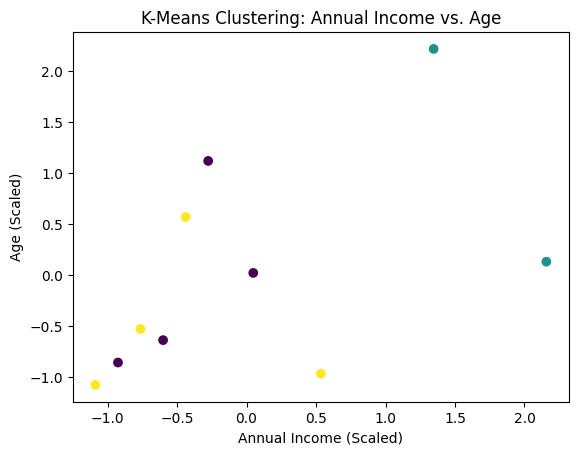

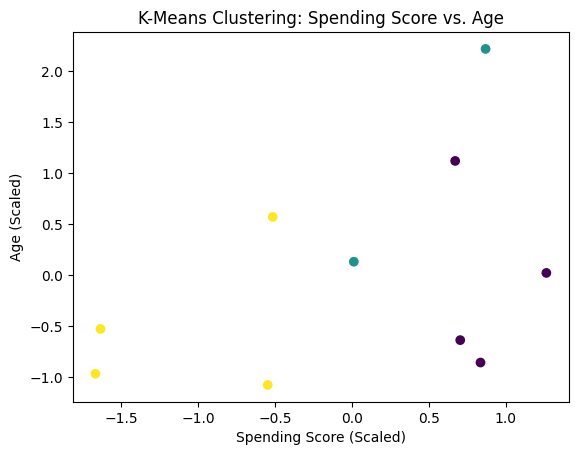

In [28]:
# Visualize the clusters for different feature pairs

# Annual Income vs. Age
plt.scatter(df_scaled['AnnualIncome'], df_scaled['Age'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering: Annual Income vs. Age')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Age (Scaled)')
plt.show()

# Spending Score vs. Age
plt.scatter(df_scaled['SpendingScore'], df_scaled['Age'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering: Spending Score vs. Age')
plt.xlabel('Spending Score (Scaled)')
plt.ylabel('Age (Scaled)')
plt.show()

Step 7: Applying dimensionality reduction (PCA or t-SNE)

Next, reduce the dimensionality of the dataset to two components for visualization. You can use PCA or t-SNE.

In [7]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert the PCA result back to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())

       PCA1      PCA2
0 -1.727176 -0.576167
1  0.282610 -1.762704
2 -2.032233  0.275256
3  0.414749 -1.395518
4 -0.658721  0.581370


For t-SNE:

In [8]:
from sklearn.manifold import TSNE

# Set perplexity to a value smaller than the number of samples
tsne = TSNE(n_components=2, perplexity=5, random_state=42)

df_tsne = tsne.fit_transform(df_scaled)

# Convert the t-SNE result back to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['t-SNE1', 't-SNE2'])
print(df_tsne.head())

      t-SNE1     t-SNE2
0  18.821220  26.394646
1 -70.246437 -67.602654
2  34.689503  65.861794
3 -49.581539 -35.680065
4  -7.743770  61.515194


For PCA:

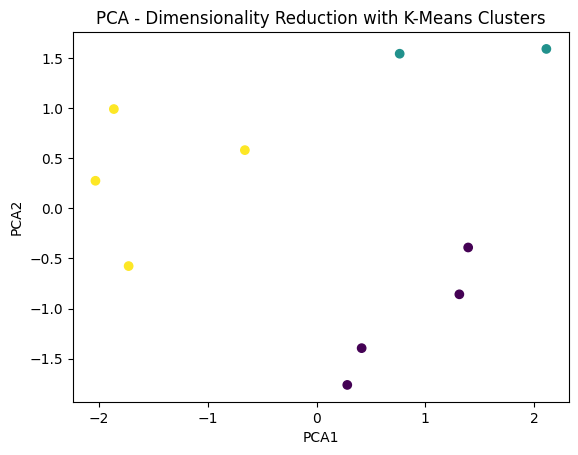

In [9]:
# Visualize the PCA components
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('PCA - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [30]:
# Example: if you used sklearn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


[0.5258831  0.33126317]
0.8571462735021216


Your PCA results
explained_variance_ratio_ = [0.5258831, 0.33126317]
👉 PC1 explains ~52.6%
👉 PC2 explains ~33.1%

Total variance explained by the first two PCs:
👉 ~85.7%

🎉 What this means
✅ 85.7% is quite high!
This tells you:

Your 2 principal components retain most of the structure in your original multi-feature data.

The 2D scatter plots you made (Annual Income vs. Age; Spending Score vs. Age; Income vs. Spending Score, etc.) give a meaningful view of the actual patterns.

The clusters you see are not heavily distorted by dimensionality reduction — they mostly reflect real relationships in your full dataset.

For t-SNE:

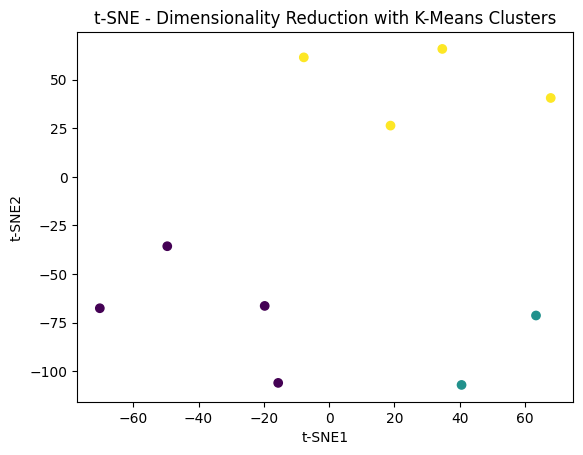

In [10]:
# Visualize the t-SNE components
plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('t-SNE - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assume `X` is your original high-dimensional data

# Raw K-Means
kmeans_raw = KMeans(n_clusters=3, random_state=42)
labels_raw = kmeans_raw.fit_predict(df_scaled)
sil_raw = silhouette_score(df_scaled, labels_raw)

# PCA
X_pca = PCA(n_components=2).fit_transform(df_scaled)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)
sil_pca = silhouette_score(X_pca, labels_pca)

# t-SNE (no silhouette score on high-distorted spaces is recommended, but can still try)
X_tsne = TSNE(n_components=2, perplexity=5, learning_rate=200, random_state=42).fit_transform(df_scaled)
kmeans_tsne = KMeans(n_clusters=3, random_state=42)
labels_tsne = kmeans_tsne.fit_predict(X_tsne)
sil_tsne = silhouette_score(X_tsne, labels_tsne)

# Print
print(f"Silhouette Score - Raw: {sil_raw:.3f}, PCA: {sil_pca:.3f}, t-SNE: {sil_tsne:.3f}")
print(f"Inertia - Raw: {kmeans_raw.inertia_:.2f}, PCA: {kmeans_pca.inertia_:.2f}")


Silhouette Score - Raw: 0.255, PCA: 0.554, t-SNE: 0.288
Inertia - Raw: 16.95, PCA: 5.50


MAtrix interpretation
Thanks for sharing your results! Let's interpret them:

---

### ✅ **Silhouette Score Analysis**

This metric ranges from **-1 to +1**. Higher values mean better-defined clusters.

| Method    | Silhouette Score | Interpretation                                                  |
| --------- | ---------------- | --------------------------------------------------------------- |
| **Raw**   | 0.255            | Weak-to-moderate cluster separation. Likely overlapping groups. |
| **PCA**   | **0.554**        | ✅ Good cluster structure — well-separated and cohesive.         |
| **t-SNE** | 0.288            | Low-to-moderate — visually distinct, but distorted distances.   |

🔍 **Takeaway**:

* **PCA + K-Means** produced the best clustering **quantitatively**.
* **t-SNE + K-Means** gave better **visual separation**, but the silhouette score reflects the fact that t-SNE distorts global distances — silhouette scores on t-SNE are often not reliable.

---

### 📉 **Inertia Analysis**

Inertia measures the compactness of the clusters (lower is better).

| Method | Inertia  | Interpretation                                                   |
| ------ | -------- | ---------------------------------------------------------------- |
| Raw    | 16.95    | More dispersed clusters.                                         |
| PCA    | **5.50** | ✅ Much more compact clusters — PCA helped isolate the structure. |

🧠 **Note**: Inertia is not meaningful for t-SNE-transformed data because distances are non-Euclidean and distorted. That’s why you usually **don’t compute inertia** for t-SNE + KMeans.

---

### 🧠 Final Summary:

| Metric         | Best Method          | Reason                                                               |
| -------------- | -------------------- | -------------------------------------------------------------------- |
| Silhouette     | ✅ **PCA + KMeans**   | Best balance between cohesion and separation.                        |
| Inertia        | ✅ **PCA + KMeans**   | Most compact clusters.                                               |
| Visual Clarity | ✅ **t-SNE + KMeans** | Best for visualizing hidden patterns (but not reliable for metrics). |

---

### 🔧 Recommendation:

If your goal is:

* 🧪 **Clustering performance** → Stick with **PCA + K-Means**
* 👁️ **Visual cluster analysis** → Use **t-SNE + K-Means**, but don’t rely on scores
* ⚙️ **Model deployment or feature reduction** → Use **PCA** (scalable, interpretable)

Let me know if you’d like help tuning hyperparameters (e.g., perplexity in t-SNE) or plotting side-by-side comparisons!


Step 9: Interpreting the results

The scatter plot will show the clusters in a lower-dimensional space. Color the points based on their k-means cluster assignment to interpret how the clusters are distributed after dimensionality reduction.

1. Raw K-Means Clustering (Annual Income vs Spending Score)
Strength: Uses actual feature values.

Limitation: Overlapping clusters; not ideal for revealing hidden structure if data is non-linearly separable.

🔬 2. PCA with K-Means Clustering (Current Plot)
Goal: Linearly reduce dimensionality while preserving variance.

Observations:

Clusters are more distinguishable than in raw features.

Still some overlap or gradient-like transitions between clusters.

PCA emphasizes directions of maximum variance, but may not preserve local neighborhood structure as well.

🧠 3. t-SNE with K-Means Clustering
Goal: Non-linear reduction focused on local relationships.

Observations:

Clusters are most clearly separated.

Captures non-linear structure and similarity patterns better than PCA.

Better suited for visualizing clusters, not for general-purpose feature reduction.

Conclusion

By completing this activity, you have successfully:

    Preprocessed a dataset using StandardScaler to normalize the features.

    Applied k-means clustering to group similar data points.

    Reduced the dimensionality of the dataset using PCA or t-SNE.

    Visualized and interpreted the clustering and dimensionality reduction outcomes.

Both clustering and dimensionality reduction are powerful techniques for uncovering hidden patterns in data. While clustering reveals groupings of similar data points, dimensionality reduction simplifies the data, making it easier to visualize and analyze.

This activity provided hands-on experience with clustering and dimensionality reduction techniques, allowing you to explore how these methods work together to make sense of high-dimensional data.